In [23]:
import tensorflow as tf
import tensorflow_datasets as tfds
from split.model import Model
import datasets.ICDAR
import PIL
from matplotlib import pyplot as plt

In [24]:
def run_model_on_random_input(model):
    height = 100
    width = 200
    random_image = tf.random.uniform(shape=(1, height, width, 3), minval=0, maxval=256, dtype='int32')
    m(random_image)

In [25]:
m = Model()
run_model_on_random_input(m)
m.load_weights('/tmp/model.ckpt')

2022-01-26 18:16:48.109000: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open /tmp/model.ckpt: DATA_LOSS: not an sstable (bad magic number): perhaps your file is in a different file format and you need to use a different restore operator?


In [26]:
ds = tfds.load('ICDAR', split='train[90%:]')

In [27]:
def get_predictions(test_image):
    test_image = tf.expand_dims(test_image, 0)
    outputs = m(test_image)
    return (
        tf.squeeze(outputs['horz_split_points_binary'], 0),
        tf.squeeze(outputs['vert_split_points_binary'], 0)
    )

2022-01-26 18:20:18.225860: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


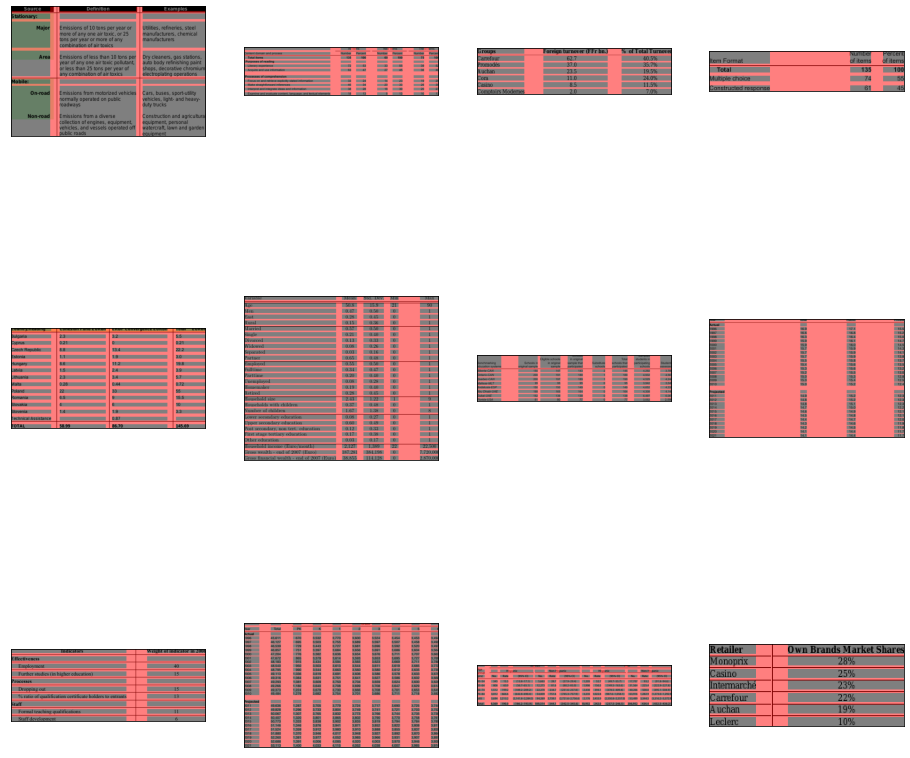

In [28]:
fig, axes = plt.subplots(3, 4, figsize=(16,16))

for element, ax in zip(ds.take(12), axes.flat):
    horz_split_points_predictions, vert_split_points_predictions = get_predictions(element['image'])
    pil_image = PIL.Image.fromarray(element['image'].numpy())
    debug_image = datasets.ICDAR.ICDAR.create_debug_image(
        pil_image, horz_split_points_predictions, vert_split_points_predictions)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(debug_image)
plt.show()